# HW 3 Поиск аномалий

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", FutureWarning)


## Загрузка модели 
Данные транзакций по кредитным картам

https://www.kaggle.com/mlg-ulb/creditcardfraud#creditcard.csv

In [2]:
data = pd.read_csv('creditcard.csv')

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Число строк (клиентов) и столбцов (признаков):

In [4]:
data.shape

(284807, 31)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Столбцы:
```
0 Time - содержит секунды, прошедшие между транзакцией и первой транзакцией в наборе данных
1-28 - V1-V28 - которые являются результатом преобразования PCA.
29 Amount - сумма транзакции 
30 Class - признак мошенничества (1 - мошенничество, 0 - нет) 
```

# EDA & Preprocessing

Проверка на пропуски

In [6]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Пропусков в данных нет

In [7]:
#Удаляем ненужный столбец Time
data = data.drop(['Time'],axis=1)

In [8]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


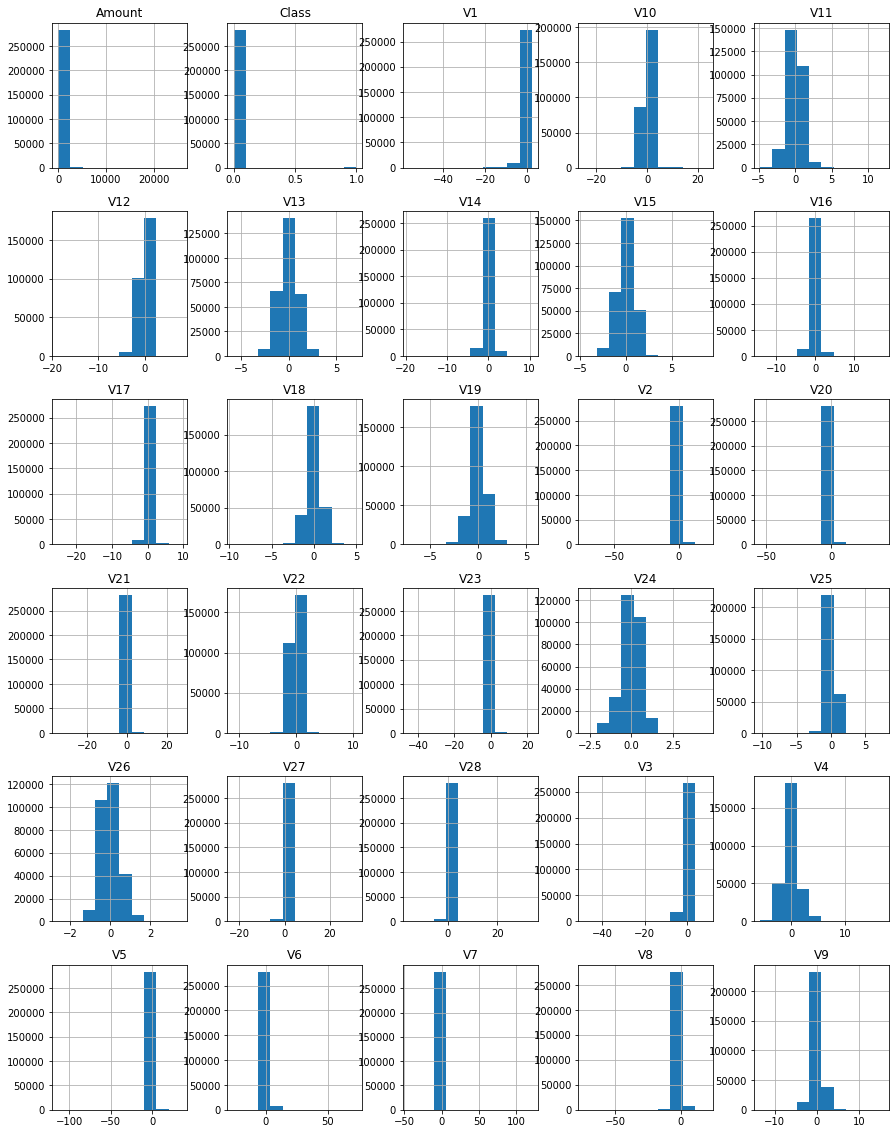

In [10]:
data.hist(figsize=(15,20));

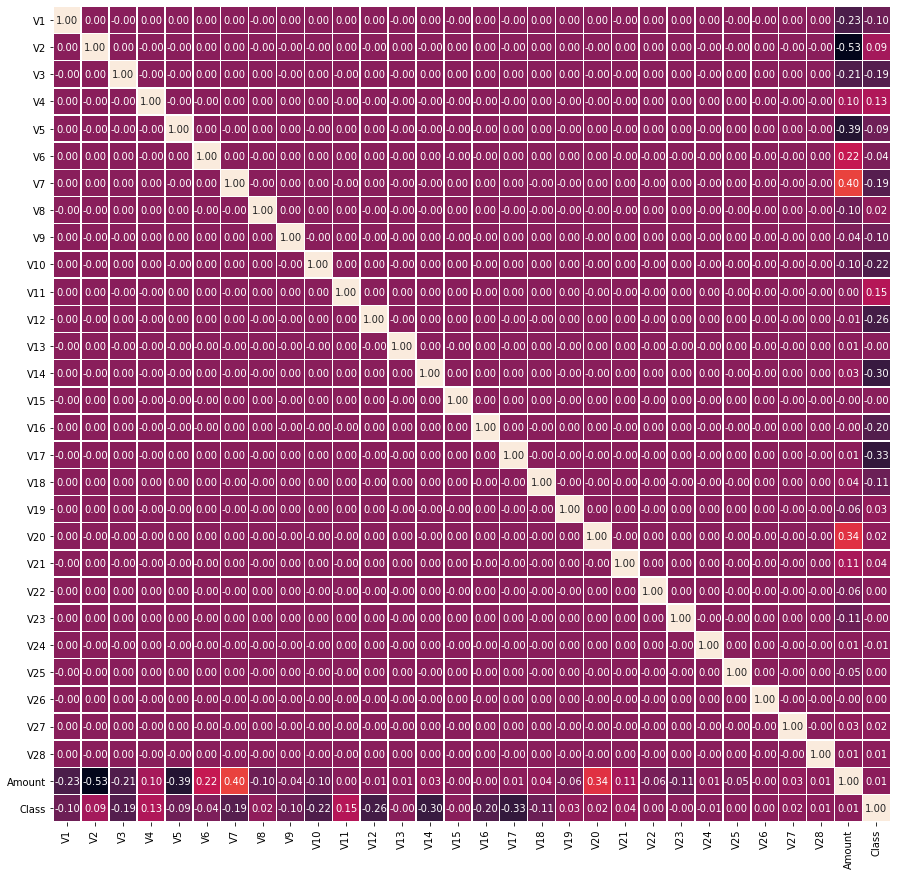

In [11]:
#correlation map
plt.figure(figsize=(15, 15))
sns.heatmap(data.corr(), annot=True, cbar=False, linewidths=.5, fmt= '.2f')
plt.show()

По матрице корреляции видно, что признаки V1-V28 не коррелируют друг с другом. По гистограмме, также видно, что в основном совершались транзакции на небольшие суммы. Посчитаем "эспертную оценку" по колонке Class 

In [12]:
anomaly_rate = sum(data['Class'])/len(data['Class'])

In [13]:
print("Всего мошеннических транзакций: {}\nПроцент мошеннических транзакций:   {:.2f}%".format(
            sum(data['Class']), 100*anomaly_rate)) 

Всего мошеннических транзакций: 492
Процент мошеннических транзакций:   0.17%


Мошеннических транзакций в выборке очень мало, всего 0.17%

In [14]:
# Данные без признака мощеннических транзакций
data_features = data.iloc[:, :-1]

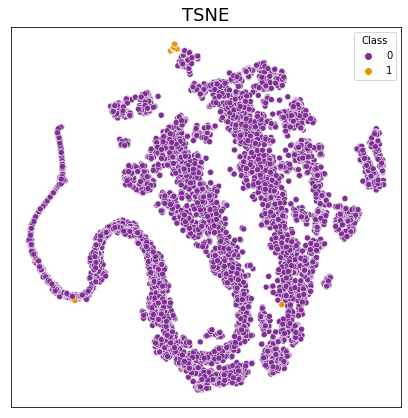

Wall time: 1min 12s


In [15]:
%%time
# Очень долгая операций, отобразим только первые 10 тыс записей
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=50, random_state=123)
tsne_transformed = tsne.fit_transform(data_features[:10000])

#plt.figure(figsize=(10, 10))
#plt.scatter(tsne_transformed[:, 0], tsne_transformed[:, 1]);
fig, ax = plt.subplots(figsize=(7, 7))
sns.scatterplot(
    x=tsne_transformed[:, 0], 
    y=tsne_transformed[:, 1], 
    hue=data[:10000]['Class'], 
    palette="CMRmap",
    legend='full'
)
plt.title("TSNE", fontsize=18)
plt.setp(ax, xticks=[], yticks=[])
plt.show()

## Поиск аномалий

### 3-сигмы

По Гистрограмме видно, что признаки V13, V15, V24 и V26 похожи на нормальное распределение, остальные не очень

In [16]:
def outlier_std(data, col, threshold=3):
    mean = data[col].mean()
    std = data[col].std()
    up_bound = mean + threshold * std
    low_bound = mean - threshold * std
    anomalies = pd.concat([data[col]>up_bound, data[col]<low_bound], axis=1).any(1)
    return anomalies, up_bound, low_bound

In [17]:
def get_column_outliers(data, columns=None, function=outlier_std, threshold=3):
    if columns:
        columns_to_check = columns
    else:
        columns_to_check = data.columns
        
    outliers = pd.Series(data=[0]*len(data), index=data_features.index, name='is_outlier')
    comparison_table = {}
    for column in columns_to_check:
        anomalies, upper_bound, lower_bound = function(data, column, threshold=threshold)
        comparison_table[column] = [upper_bound, lower_bound, sum(anomalies), 100*sum(anomalies)/len(anomalies)]
        outliers[anomalies[anomalies].index] = 1
    
    comparison_table = pd.DataFrame(comparison_table).T
    comparison_table.columns=['upper_bound', 'lower_bound', 'anomalies_count', 'anomalies_percentage']
    comparison_table = comparison_table.sort_values(by='anomalies_percentage', ascending=False)
    
    return comparison_table, outliers

def anomalies_report(outliers):
    print("Total number of outliers: {}\nPercentage of outliers:   {:.2f}%".format(
            sum(outliers), 100*sum(outliers)/len(outliers)))    

In [18]:
comparison_table, std_outliers = get_column_outliers(data_features, threshold=18)
anomalies_report(std_outliers)

Total number of outliers: 498
Percentage of outliers:   0.17%


In [19]:
comparison_table

,upper_bound,lower_bound,anomalies_count,anomalies_percentage
V23,11.240285,-11.240285,114.0,0.040027
V21,13.221432,-13.221432,92.0,0.032303
V28,5.941499,-5.941499,88.0,0.030898
V20,13.876650,-13.876650,85.0,0.029845
V8,21.498352,-21.498352,77.0,0.027036
Amount,4590.511586,-4413.812347,74.0,0.025983
V17,15.288067,-15.288067,73.0,0.025631
V2,29.723554,-29.723554,45.0,0.015800
V7,22.267685,-22.267685,45.0,0.015800
V27,7.265385,-7.265385,33.0,0.011587


In [20]:
# Функция оценки качества
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
crs = []
def quality_check(y_true, y_pred, name, labels):
    labels = ['ok', 'fraud']
    print("Confusion matrix:\n")
    cm = confusion_matrix(y_true, y_pred)
    print(cm)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot()
    plt.show()
    print("\n-----------------------------------------------------")
    print("\nClassification report:\n")
    cr = classification_report(y_true, y_pred)
    print(cr)
    crs.append({name: cr})

Confusion matrix:

[[283906    409]
 [   403     89]]


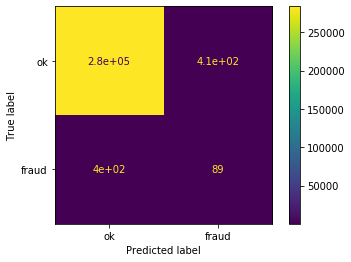


-----------------------------------------------------

Classification report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.18      0.18      0.18       492

    accuracy                           1.00    284807
   macro avg       0.59      0.59      0.59    284807
weighted avg       1.00      1.00      1.00    284807



In [21]:
quality_check(data['Class'], std_outliers, name='3 сигмы', labels=['ok', 'fraud'])

### Межквартильное отклонение IQR

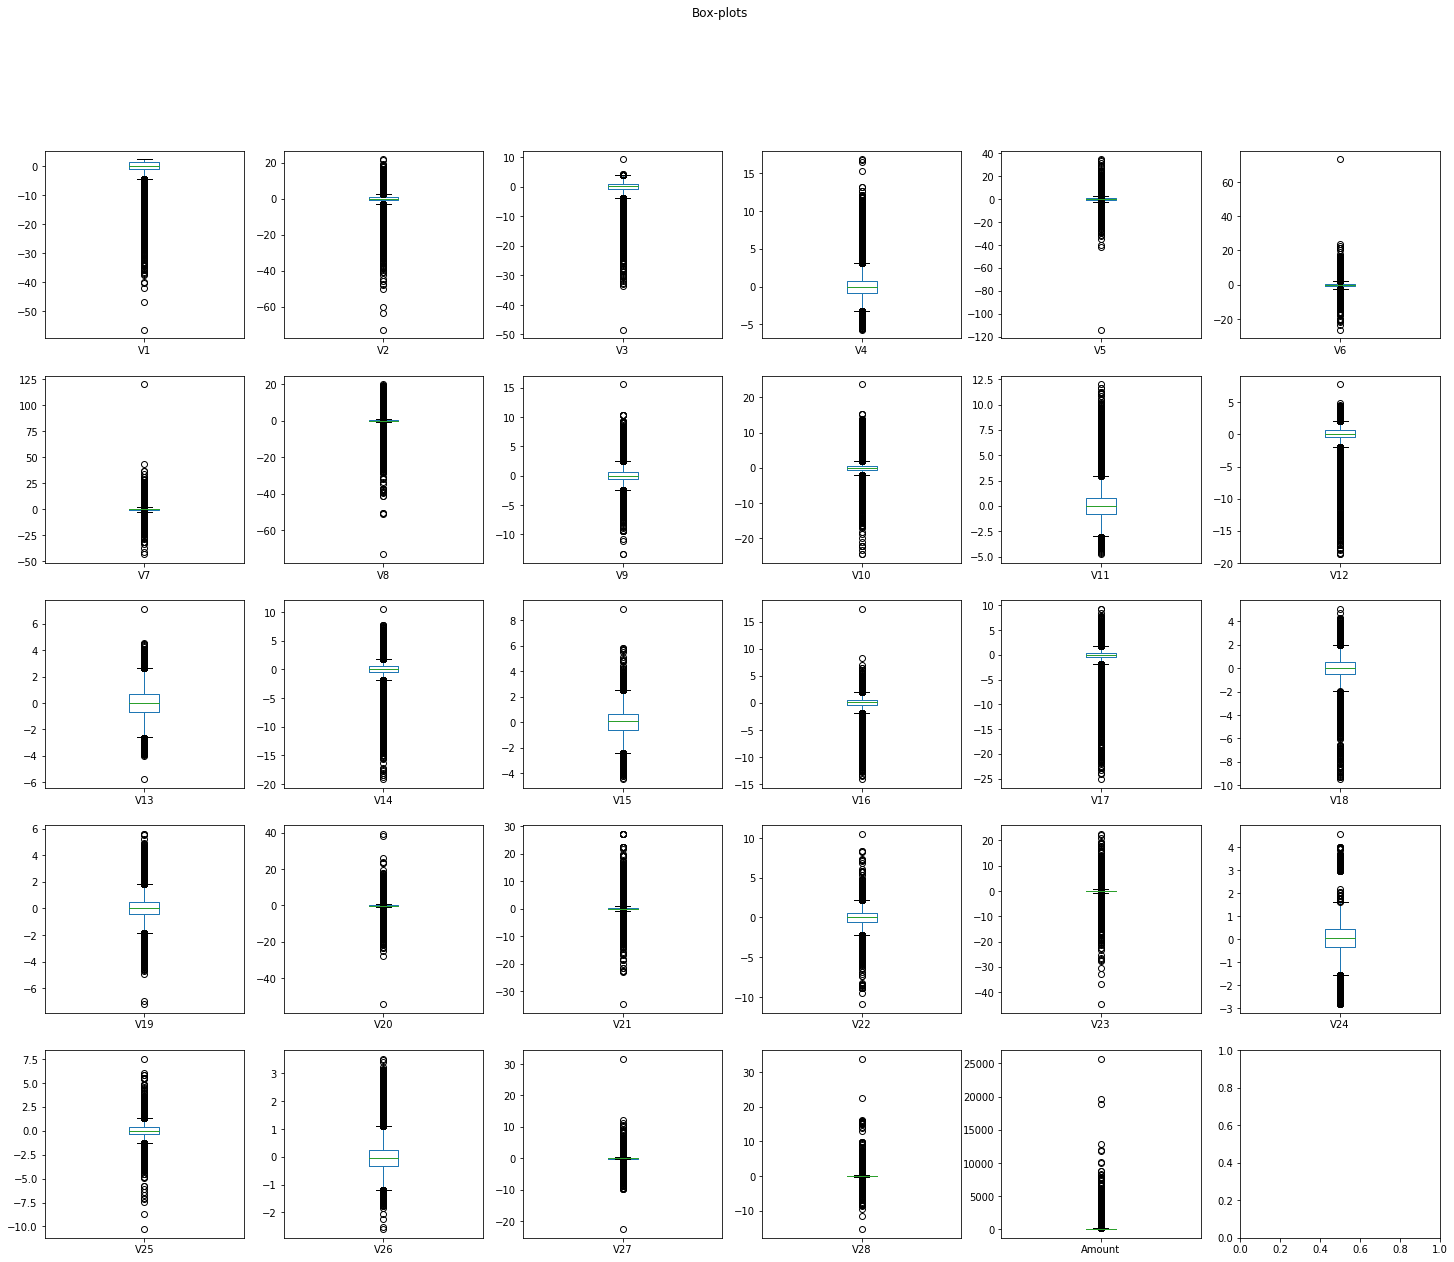

In [22]:
fig, axes = plt.subplots(5, 6, figsize=(25, 20))
fig.suptitle('Box-plots')

row=0
col=0

for ax, feature in enumerate(data_features):
    data_features[feature].plot.box(ax=axes[row, col])
    col+=1
    if col > 5:
        row+=1
        col=0

In [23]:
def outlier_iqr(data, col, threshold=1.5):
    IQR = data[col].quantile(0.75) - data[col].quantile(0.25)
    up_bound = data[col].quantile(0.75) + (IQR * threshold)
    low_bound = data[col].quantile(0.25) - (IQR * threshold)
    anomalies = pd.concat([data[col]>up_bound, data[col]<low_bound], axis=1).any(1)
    return anomalies, up_bound, low_bound

In [24]:
comparison_table, iqr_outliers = get_column_outliers(data_features, function=outlier_iqr, threshold=43)
anomalies_report(iqr_outliers)

Total number of outliers: 480
Percentage of outliers:   0.17%


Confusion matrix:

[[283850    465]
 [   477     15]]


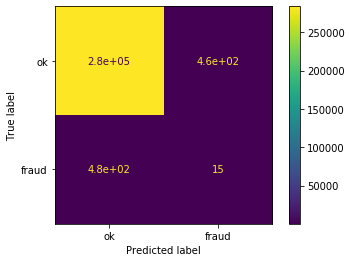


-----------------------------------------------------

Classification report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.03      0.03      0.03       492

    accuracy                           1.00    284807
   macro avg       0.51      0.51      0.51    284807
weighted avg       1.00      1.00      1.00    284807



In [25]:
quality_check(data['Class'], iqr_outliers, name='IQR', labels=['ok', 'fraud'])

### Кластеризация (Distance-based)

In [26]:
from sklearn.base import BaseEstimator
from scipy.spatial.distance import cdist
from sklearn.preprocessing import RobustScaler

class DistanceOutliers(BaseEstimator):
    """
    -----------
    Parameters:
    
    - metric: string, default - euclidean
        metric to use for distance calculation (see scipy.spatial.distance.cdist)
        
    - percentile: float in range [0, 100]
        hyperparameter which sets the threshold for anomalies
    """
    def __init__(self, metric='euclidean', percentile=90):
        self.metric = metric
        self.percentile = percentile
        
    def fit(self, X):
        self.centroid = np.mean(X, axis=0).values.reshape(-1, 1).T
        distances_train = cdist(self.centroid, X, metric=self.metric).reshape(-1)
        self.threshold = np.percentile(distances_train, self.percentile)
        
    def predict(self, X):
        distances = cdist(self.centroid, X, metric=self.metric).reshape(-1)
        predictions = (distances > self.threshold).astype(int)
        return predictions

In [27]:
scaler = RobustScaler()
scaled_data = pd.DataFrame(
    data=scaler.fit_transform(data_features), 
    columns=data_features.columns
)

In [28]:
euclidian_model = DistanceOutliers(metric='euclidean', percentile=99.83)
euclidian_model.fit(scaled_data)
euclidian_outliers = euclidian_model.predict(scaled_data)
anomalies_report(euclidian_outliers)

Total number of outliers: 485
Percentage of outliers:   0.17%


Confusion matrix:

[[283848    467]
 [   474     18]]


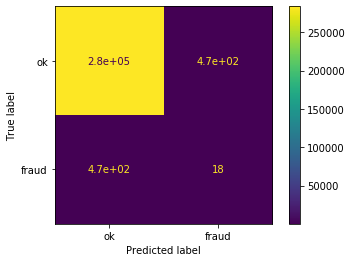


-----------------------------------------------------

Classification report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.04      0.04      0.04       492

    accuracy                           1.00    284807
   macro avg       0.52      0.52      0.52    284807
weighted avg       1.00      1.00      1.00    284807



In [29]:
quality_check(data['Class'], euclidian_outliers, name='euclidian', labels=['ok', 'fraud'])

## манхэтановское расстояние

In [30]:
citiblock_model = DistanceOutliers(metric='cityblock', percentile=99.83)
citiblock_model.fit(scaled_data)
citiblock_outliers = citiblock_model.predict(scaled_data)
anomalies_report(citiblock_outliers)

Total number of outliers: 485
Percentage of outliers:   0.17%


Confusion matrix:

[[283942    373]
 [   380    112]]


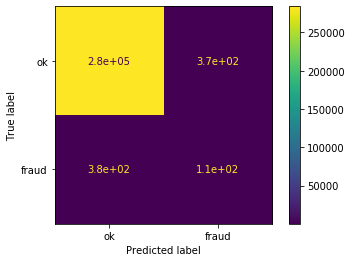


-----------------------------------------------------

Classification report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.23      0.23      0.23       492

    accuracy                           1.00    284807
   macro avg       0.61      0.61      0.61    284807
weighted avg       1.00      1.00      1.00    284807



In [31]:
quality_check(data['Class'], citiblock_outliers, name='cityblock', labels=['ok', 'fraud'])

### DBScan

In [32]:
%%time
# Очень медленная, попробуем найти eps для малой выборки (1500 записей)
# Останавливаем поиск, когда процент аномалий меньше, чем при 'эксперной оценки'
from sklearn.cluster import DBSCAN

# для начала считаем все наблюдения аномальными
outlier_percentage = 1.

num_clusters = []
anomaly_percentage = []

# берем маленький эпсилон и начинаем увеличивать
eps = 0.05
eps_history = [eps]
while outlier_percentage>anomaly_rate:    
    model = DBSCAN(eps=eps).fit(scaled_data[:1500])
    labels = model.labels_
    num_clusters.append(len(np.unique(labels))-1)
    labels = np.array([1 if label == -1 else 0 for label in labels])
    # считаем текущий процент "шума"
    outlier_percentage = sum(labels==1) / len(labels)    
    eps += 0.05
    eps_history.append(eps)
    anomaly_percentage.append(outlier_percentage)


Wall time: 1min 14s


In [33]:
eps

16.950000000000106

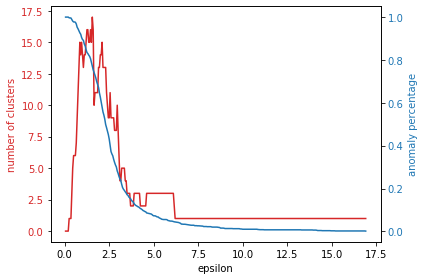

In [34]:
iterations = eps_history[:-1]

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('epsilon')
ax1.set_ylabel('number of clusters', color=color)
ax1.plot(iterations, num_clusters, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('anomaly percentage', color=color)  
ax2.plot(iterations, anomaly_percentage, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.show()

In [35]:
%%time
# Считаем DBSCAN для небольшой выборки (20000 записей)
model = DBSCAN(eps)
model.fit(scaled_data[:20000])
dbscan_outliers = np.array([1 if label == -1 else 0 for label in model.labels_])
anomalies_report(dbscan_outliers)

Total number of outliers: 33
Percentage of outliers:   0.17%
Wall time: 44.7 s


Confusion matrix:

[[19883    32]
 [   84     1]]


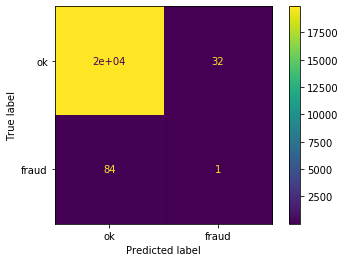


-----------------------------------------------------

Classification report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19915
           1       0.03      0.01      0.02        85

    accuracy                           0.99     20000
   macro avg       0.51      0.51      0.51     20000
weighted avg       0.99      0.99      0.99     20000



In [36]:
quality_check(data[:20000]['Class'], dbscan_outliers, name='dbscan', labels=['ok', 'fraud'])

DBScan очень мендлено работает при большом количестве записей.

## One-Class SVM

In [37]:
%%time
# Тоже медленно работает. Посчитал для выборки в 100 тыс. записей
from sklearn.svm import OneClassSVM

one_class_svm = OneClassSVM(nu=anomaly_rate, gamma='auto')
one_class_svm.fit(scaled_data[:100000])
svm_outliers = one_class_svm.predict(scaled_data[:100000])
svm_outliers = np.array([1 if label == -1 else 0 for label in svm_outliers])
anomalies_report(svm_outliers)

Total number of outliers: 1381
Percentage of outliers:   1.38%
Wall time: 1min 1s


Confusion matrix:

[[98458  1319]
 [  161    62]]


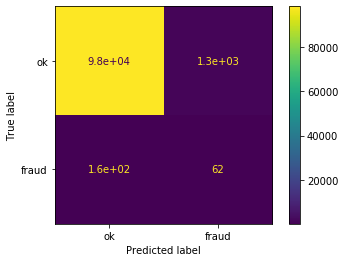


-----------------------------------------------------

Classification report:

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     99777
           1       0.04      0.28      0.08       223

    accuracy                           0.99    100000
   macro avg       0.52      0.63      0.53    100000
weighted avg       1.00      0.99      0.99    100000



In [38]:
quality_check(data[:100000]['Class'], svm_outliers, name='SVM', labels=['ok', 'fraud'])

### Isolation Forest

In [39]:
%%time
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(n_estimators=100, contamination=anomaly_rate, 
                                   max_features=1.0, bootstrap=True)
isolation_forest.fit(scaled_data)

isolation_outliers = isolation_forest.predict(scaled_data)
isolation_outliers = np.array([1 if label == -1 else 0 for label in isolation_outliers])
anomalies_report(isolation_outliers)

Total number of outliers: 492
Percentage of outliers:   0.17%


Confusion matrix:

[[283952    363]
 [   363    129]]


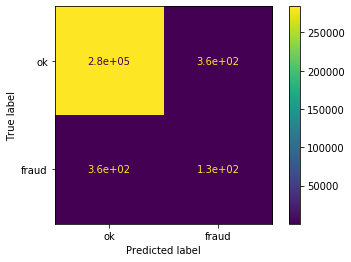


-----------------------------------------------------

Classification report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.26      0.26      0.26       492

    accuracy                           1.00    284807
   macro avg       0.63      0.63      0.63    284807
weighted avg       1.00      1.00      1.00    284807



In [40]:
quality_check(data['Class'], isolation_outliers, name='Isolation Forest', labels=['ok', 'fraud'])

## Сравнение результатов 

In [44]:
for c in crs:
    name = list(c)[0]
    print("Report for: {}\n".format(name)) 
    print(c[name])
    print("\n")

Report for: 3 сигмы

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.18      0.18      0.18       492

    accuracy                           1.00    284807
   macro avg       0.59      0.59      0.59    284807
weighted avg       1.00      1.00      1.00    284807



Report for: IQR

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.03      0.03      0.03       492

    accuracy                           1.00    284807
   macro avg       0.51      0.51      0.51    284807
weighted avg       1.00      1.00      1.00    284807



Report for: euclidian

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.04      0.04      0.04       492

    accuracy                           1.00    284807
   macro avg       0.52      0.52      0.52    284807
weighted 

### Выводы

В результате сравнения методов поиска аномалий:

```
Precision лучше всех у Isolation Forest, далее у citiblock (манхетовское расстояние) и метода 3-сигм
Recall лучше всех у SVN, далее Isolcation Forst и citiblock
```
По производительность и качеству поиска аномалий можно выделить метод Isolation Forest